<div style="text-align: center; font-size: 30px; color: red; font-family: 'Arial', sans-serif;">
    <b>Análisis de Hábitos de Compra en Instacart</b>
</div>

# Contenido <a id='back'></a>

* [Introducción](#intro)
* [Etapa 1. Descripción de los datos](#data_review)
    * [Conclusiones](#data_review_conclusions)
* [Etapa 2. Preprocesamiento de datos](#data_preprocessing)
    * [2.1 Valores Duplicados](#duplicates)
    * [2.2 Valores ausentes](#missing_values)
    * [2.3 Tipos de datos](#data_type)
    * [2.4 Conclusiones](#data_preprocessing_conclusions)
* [Etapa 3. Análisis de los datos](#data_analyst)
* [Conclusiones finales del proyecto](#end)

## Introducción <a id='intro'></a>

## Diccionario de Datos

### Tabla: 'instacart_orders.csv'
Cada fila corresponde a un pedido en la aplicación Instacart.

- **order_id**: Número de ID que identifica de manera única cada pedido.
- **user_id**: Número de ID que identifica de manera única la cuenta de cada cliente.
- **order_number**: El número de veces que este cliente ha hecho un pedido.
- **order_dow**: Día de la semana en que se hizo el pedido (0 si es domingo).
- **order_hour_of_day**: Hora del día en que se hizo el pedido.
- **days_since_prior_order**: Número de días transcurridos desde que este cliente hizo su pedido anterior.

### Tabla: 'products.csv'
Cada fila corresponde a un producto único que pueden comprar los clientes.

- **product_id**: Número ID que identifica de manera única cada producto.
- **product_name**: Nombre del producto.
- **aisle_id**: Número ID que identifica de manera única cada categoría de pasillo de víveres.
- **department_id**: Número ID que identifica de manera única cada departamento de víveres.

### Tabla: 'order_products.csv'
Cada fila corresponde a un artículo pedido en un pedido.

- **order_id**: Número de ID que identifica de manera única cada pedido.
- **product_id**: Número ID que identifica de manera única cada producto.
- **add_to_cart_order**: El orden secuencial en el que se añadió cada artículo en el carrito.
- **reordered**: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.

### Tabla: 'aisles.csv'
- **aisle_id**: Número ID que identifica de manera única cada categoría de pasillo de víveres.
- **aisle**: Nombre del pasillo.

### Tabla: 'departments.csv'
- **department_id**: Número ID que identifica de manera única cada departamento de víveres.
- **department**: Nombre del departamento.



## Etapa 1: Descripción de los datos <a id='data_review'></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_instacart_orders = pd.read_csv('/home/josue/instacart_orders.csv', delimiter=';')
df_products = pd.read_csv('/home/josue/products.csv', delimiter=';')
df_order_products = pd.read_csv('/home/josue/order_products.csv', delimiter=';')
df_aisles = pd.read_csv('/home/josue/aisles.csv', delimiter=';')
df_departments = pd.read_csv('/home/josue/departments.csv', delimiter=';')

In [59]:
df = [df_instacart_orders, df_products, df_order_products, df_aisles, df_departments]

for row in df:
    row.info(show_counts=True)
    print()

<class 'pandas.core.frame.DataFrame'>
Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478952 non-null  int64
 1   user_id                 478952 non-null  int64
 2   order_number            478952 non-null  int64
 3   order_dow               478952 non-null  int64
 4   order_hour_of_day       478952 non-null  int64
 5   days_since_prior_order  478952 non-null  Int64
dtypes: Int64(1), int64(5)
memory usage: 26.0 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

<class 'pand

In [4]:
for row in df:
    print(row.head())
    print()

   order_id  user_id  order_number  order_dow  order_hour_of_day  \
0   1515936   183418            11          6                 13   
1   1690866   163593             5          5                 12   
2   1454967    39980             4          5                 19   
3   1768857    82516            56          0                 20   
4   3007858   196724             2          4                 12   

   days_since_prior_order  
0                    30.0  
1                     9.0  
2                     2.0  
3                    10.0  
4                    17.0  

   product_id                                       product_name  aisle_id  \
0           1                         Chocolate Sandwich Cookies        61   
1           2                                   All-Seasons Salt       104   
2           3               Robust Golden Unsweetened Oolong Tea        94   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...        38   
4           5                   

In [5]:
for row in df:
    print(row.isna().sum())
    print(f'Este DataFrame tiene {row.duplicated().sum()} filas duplicadas')
    print()
    print()

order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64
Este DataFrame tiene 15 filas duplicadas


product_id          0
product_name     1258
aisle_id            0
department_id       0
dtype: int64
Este DataFrame tiene 0 filas duplicadas


order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
Este DataFrame tiene 0 filas duplicadas


aisle_id    0
aisle       0
dtype: int64
Este DataFrame tiene 0 filas duplicadas


department_id    0
department       0
dtype: int64
Este DataFrame tiene 0 filas duplicadas




## Conclusiones <a id='data_review_conclusions'></a>

Primero se les asignó nombre a cada uno de los 5 conjuto de datos que se analizarán para después convertirlos a formato df de pandas. Se analizaron a detalle los 5 df y cada fila de ellos, los nombres de las columnas estan correcatmente escritas, siguen el estilo snake_case, ademas comienzan con letras miniscúlas, asi que el formato de ellas es correcto, pero hemos encontrando los siguientes problemas.

1. La columna 'days_since_prior_order' en el df *df_instacart_orders* tiene un tipo de dato float64, lo que de dejarlo asi ocasionaría prbolemas a la hora de llegar a esa columna, procederemos mas adelante con el método dtype convertirla a un tipo correcto.

2. La columna 'add_to_cart_order' en el df *df_order_products* tiene un tipo de dato float64, debido a la descricpión de esta columna tiene, se cambiará a un formato entero.

3. Tenemos algunas columnas con valores ausentes, tal es el caso de las columnas 'days_since_prior_order', 'product_name', 'add_to_cart_order', esto se tiene que corregir y encontrar la mejor manera de hacerlo.

4. Tenemos algunas filas duplicadas sólo en el df *df_instacart_orders* estas se tendrán que eliminar, las demás filas no presentan filas duplicadas.

## Etapa 2: Preprocesamiento de datos <a id='data_preprocessing'></a>

## 2.1 Valores duplicados <a id='#duplicates'></a>

## DataFrame df_instacart_orders

Tal como previamente habíamos visto en el DataFrame df_instacart_orders tenemos unas filas duplicadas procederemos a evaluarlas a detalle, y después a eliminarlas.

In [6]:
print(df_instacart_orders[df_instacart_orders.duplicated()])

        order_id  user_id  order_number  order_dow  order_hour_of_day  \
145574    794638    50898            24          3                  2   
223105   2160484   107525            16          3                  2   
230807   1918001   188546            14          3                  2   
266232   1782114   106752             1          3                  2   
273805   1112182   202304            84          3                  2   
284038   2845099    31189            11          3                  2   
311713   1021560    53767             3          3                  2   
321100    408114    68324             4          3                  2   
323900   1919531   191501            32          3                  2   
345917   2232988    82565             1          3                  2   
371905    391768    57671            19          3                  2   
394347    467134    63189            21          3                  2   
411408   1286742   183220            48          3 

In [7]:
df_instacart_orders.drop_duplicates(inplace=True)

In [8]:
for column in df_instacart_orders.columns:
    duplicated = df_instacart_orders[column].duplicated()
    if duplicated.any():
        print(f"Duplicados en la columna {column}")
        print(df_instacart_orders[duplicated])
        print('\n')
    else:
        print("No se encontraron duplicados")

No se encontraron duplicados
Duplicados en la columna user_id
        order_id  user_id  order_number  order_dow  order_hour_of_day  \
109      2646057    20084             6          0                 13   
354      2593694    65807            98          4                 21   
379      2740290    87345             6          4                 14   
729         7531    18130            17          1                  8   
734      1500229   130466            18          3                 12   
...          ...      ...           ...        ...                ...   
478962   3210681     5617             5          1                 14   
478963   3270802   112087             2          3                 13   
478964    885349    82944            16          2                 11   
478965    216274     4391             3          3                  8   
478966   2071924     1730            18          1                 14   

        days_since_prior_order  
109                        7

In [9]:
print(df_instacart_orders[df_instacart_orders.duplicated()])
print()
print(df_instacart_orders.duplicated().sum())

Empty DataFrame
Columns: [order_id, user_id, order_number, order_dow, order_hour_of_day, days_since_prior_order]
Index: []

0


En el análisis que habiamos hecho previamente habíamos visto que justo en esta último df teniamos 15 filas duplicadas por completo, se abordó este problema y quedó resuelto, por otro lado teníamos que comprobar si en las columnas no habia valores repetidos, en especial la columna order_id que es la que identifica de manera inequívoca cada compra en instacart, fue un alivio ver que no hay valores duplicados en dicha columna, en las demás si existen valores duplicados pero es normal que los haya, gracias a un bucle for, pudimos encontrar esta información de forma rápida.

## DataFrame df_products

In [10]:
print(df_products.duplicated().sum())

0


Como podemos notar no tiene filas totalmente iguales, ahora veremos que tal se comportan las filas por columnas duplicadas mediante un ciclo for.

In [11]:
for column in df_products.columns:
    duplicated = df_products[column].duplicated()
    if duplicated.any():
        print(f'La columna {column} tiene valores duplicados')
        print(df_products[duplicated])
        print('\n')
    else:
        print(f'La columna {column} no tiene filas duplicadas')

La columna product_id no tiene filas duplicadas
La columna product_name tiene valores duplicados
       product_id product_name  aisle_id  department_id
71             72          NaN       100             21
109           110          NaN       100             21
296           297          NaN       100             21
416           417          NaN       100             21
436           437          NaN       100             21
...           ...          ...       ...            ...
49552       49553          NaN       100             21
49574       49575          NaN       100             21
49640       49641          NaN       100             21
49663       49664          NaN       100             21
49668       49669          NaN       100             21

[1257 rows x 4 columns]


La columna aisle_id tiene valores duplicados
       product_id                                       product_name  \
12             13                                  Saline Nasal Mist   
19             

Después de ejecutar este ciclo for nos damos cuenta der varias cosas que se tienen que resolver, se enlistan a continuación.
1. La columna product_id del df_products no tiene filas duplicadas lo cual es bueno ya que un producto debe ser único.
2. En la columna de product_name del df_products vemos primero que tiene valores ausentes, después que tiene valores no normalizados, para un análisis más fácil tenemos que cambiar a lower() todas las filas, y ver que sean valores únicos.
3. En las columnas últimas aisle_id y department_id aunque hay filas duplicadas es es obvio que hay muchos productos que son comprados del mismo pasillo o del mismo departamento, así que aquí no tenemos problemas.

In [12]:
df_products['product_name'] = df_products['product_name'].str.lower()

In [13]:
product_name_not_nan = df_products[df_products['product_name'].notna()]['product_name'].duplicated()
print(f'Número de productos repetidos excluyendo Nan: {product_name_not_nan.sum()}')
print()
print()
product_name_nan = df_products['product_name'].isna().sum()
print(f'Número de productos faltantes: {product_name_nan}')

Número de productos repetidos excluyendo Nan: 104


Número de productos faltantes: 1258


Después de evaluar a detalle, comentamos que la columna 'product_name' ha sido normalizada con lower(), también nos hemos dado cuenta tiene valores ausentes, mas adelante tendremos que tratar estos valores.

## DataFrame df_order_products

In [14]:
print(df_order_products.duplicated().sum())

0


In [15]:
for column in df_order_products.columns:
    duplicated = df_order_products[column].duplicated()
    if duplicated.any():
        print(f'La columna {column} tiene filas duplicadas')
        print(df_order_products[duplicated])
        print('\n')
    else:
        print(f'La columna {column} no tiene filas duplicadas')
    

La columna order_id tiene filas duplicadas
         order_id  product_id  add_to_cart_order  reordered
367       2867619       48094                9.0          0
824        844425       39408               10.0          1
1124      3319857       37067               19.0          0
1258      1038788       12471               14.0          0
1303      2825714       44632               16.0          1
...           ...         ...                ...        ...
4545002    577211       15290               12.0          1
4545003   1219554       21914                9.0          0
4545004    692640       47766                4.0          1
4545005    319435         691                8.0          1
4545006   1398151       28733                9.0          0

[4094961 rows x 4 columns]


La columna product_id tiene filas duplicadas
         order_id  product_id  add_to_cart_order  reordered
19        2500729       21616                5.0          1
20        1687771       22963             

##

Podemos concluir que filas duplicadas este df no tiene, al momento de evaluar a detalle si tiene filas en las columnas repetidas nos llevamos la sopresa de alguna forma que todas las columnas tienen filas repetidas, y en el contecto de este df es válido, por ejemplo en 'order_id' es válido que haya filas duplicadas, ya que cada pedido único puede haber echo varios pedidos de productos, es importante analizar y comprender bien este tipo de situaciones.

## DataFrame df_aisles

In [16]:
print(df_aisles.duplicated().sum())

0


In [17]:
for column in df_aisles.columns:
    duplicated = df_aisles[column].duplicated()
    if duplicated.any():
        print(f'La columna {column} tiene filas duplicadas')
        print(df_aisles[duplicated])
        print('\n')
    else:
        print(f'La columna {column} no tiene valores repetidos')

La columna aisle_id no tiene valores repetidos
La columna aisle no tiene valores repetidos


El DataFrame no tiene problema alguno no tiene filas totalmente duplicadas, ni filas por columnas duplicadas. Era importante que no hubiera en las columnas valores duplicados, ya que solo puede haber pasillos unicos y solo un nombre para cada pasillo.

## DataFrame df_departments

In [18]:
print(df_departments.duplicated().sum())

0


In [19]:
for column in df_departments.columns:
    duplicated = df_departments[column].duplicated()
    if duplicated.any():
        print(f'La columna {column} tiene filas repetidas')
        print(df_departments[duplicated])
        print('\n')
    else:
        print(f'La columna {column} no tiene filas repetidas')

La columna department_id no tiene filas repetidas
La columna department no tiene filas repetidas


Todo esta correcto, no tiene filas totalmente duplicadas ni las columnas por separado tienen filas duplicadas, es importante que no tuviera duplicados debido a que solo puede haber deparatmentos unicos junto con nombres de ellos de la misma forma.

## 2.2 Valores ausentes <a id='#mising_values'></a>

Cuando se analizaron los DataFrame con el método info nos dimos cuenta que existen 3 columnas con valores ausentes, que son las siguientes. 
1. days_since_prior_order    28819
2. product_name              1258
3. add_to_cart_order         836

Estas 3 columnas junto con sus filas ausentes deben ser evaluadas para saber la mejor forma de corregir esta problematica que nos está afectando, evaluemos a detalle esa situación y lleguemos a la mejor decisión.

### Columna days_since_prior_order

Hemos podido encontrar una excelente lectura de los datos faltantes, vemos que los valores ausentes de la columna days_since_prior_order pertenecen a las primeras compras, de esta forma entendemos que son primeros clientes, debido a que son una cantidad considerable de datos no los vamos a eliminar, los vamos a sustiuir con el valor 0, que nos indica que si un cliente es nuevo entonces han pasado 0 días de su último pedido debido a que es su primera compra.

In [20]:
df_instacart_orders['days_since_prior_order'].fillna(0, inplace=True)

In [21]:
df_instacart_orders['days_since_prior_order'].isna().sum()

0

Hemos concluido la primera columna con datos ausentes, sigamos adelante.

### Columna product_name

In [22]:
pn_nan = df_products[df_products['product_name'].isna() & (df_products['department_id'] == 21) & (df_products['aisle_id'] == 100)]
pn_nan

,product_id,product_name,aisle_id,department_id
37,38,NaN,100,21
71,72,NaN,100,21
109,110,NaN,100,21
296,297,NaN,100,21
416,417,NaN,100,21
...,...,...,...,...
49552,49553,NaN,100,21
49574,49575,NaN,100,21
49640,49641,NaN,100,21
49663,49664,NaN,100,21


In [23]:
df_aisles[df_aisles['aisle_id'] == 100]

,aisle_id,aisle
99,100,missing


In [24]:
df_departments[df_departments['department_id'] == 21]

,department_id,department
20,21,missing


In [25]:
df_products['product_name'].fillna('Unknown', inplace=True)

In [26]:
df_products['product_name'].isna().sum()

0

Después de primero analizar cada fila vacía, nos dimos cuenta que todas las filas ausentes pertenecían todas al pasillo con id 100 y al departamento con id 21, al ver esto, analizamos a detalle las tablas por separado de estos productos y nos dimos cuenta que ambas tienen el valor de missing es decir desaparecido, de esta forma la opción practica es sustiuir los valores ausentes con 'Unknown', así esta columna ha quedado resuelta.

### Columna add_to_cart_order

In [27]:
atco_nan = df_order_products['add_to_cart_order'].isna()
df_order_products[atco_nan]

,order_id,product_id,add_to_cart_order,reordered
737,2449164,5068,NaN,0
9926,1968313,43867,NaN,0
14394,2926893,11688,NaN,0
16418,1717990,4142,NaN,0
30114,1959075,42828,NaN,1
...,...,...,...,...
4505662,1800005,7411,NaN,0
4511400,1633337,260,NaN,0
4517562,404157,9517,NaN,0
4534112,1673227,17835,NaN,0


In [28]:
atco_min = df_order_products['add_to_cart_order'].min()
atco_max = df_order_products['add_to_cart_order'].max()
print(f'El valor mínimo de add_to_cart_order es: {atco_min} ')
print(f'El valor máximo de add_to_cart_order es: {atco_max} ')

El valor mínimo de add_to_cart_order es: 1.0 
El valor máximo de add_to_cart_order es: 64.0 


In [55]:
df_filtered_atco_nan = df_order_products[atco_nan]

In [30]:
atco_groupby = df_filtered_atco_nan.groupby('order_id')['product_id'].count()
atco_groupby_sorted = atco_groupby.sort_values(ascending=False)
print(atco_groupby_sorted)

order_id
61355      63
3308010    51
2136777    44
171934     40
1959075    34
           ..
888470      1
1598369     1
747668      1
1677118     1
9310        1
Name: product_id, Length: 70, dtype: int64


In [31]:
df_order_products['add_to_cart_order'].fillna(999, inplace=True)

In [32]:
print(df_order_products['add_to_cart_order'].isna().sum())

0


En esta columna add_to_cart_order teníamos valores ausentes, primero hicimos un filtro para ver mas sobre esas 836 filas ausentes, obtuvimos el valor mínimo y máximo de esta columna para saber mas sobre ella, al final mediante un groupby agrupamos por 'order_id' para saber mas al respecto, lo que noz hizo darnos una idea un tanto corta del orden en que los productos son agregados al carrito mediante el número de orden de cada pedido, como no tenemos una forma muy clara de como sustuir estos rellenaremos estas filas con el valor 999, eliminarlas perderíamos infomación útil, de esta forma al agregar 999 sabremos el significado de esto.

## Correción de la sugerencia
El valor de `add_to_cart_order` se detiene en 64 debido a que es el máximo valor de orden productos agregados al carrito, debido a que en la tabla `products` uno o mas usuarios en un pedido ordenaron 64 productos, y un producto fue agregado en el orden 64, esta es la razón de este valor.

## 2.3 Tipos de datos <a id='#data_type'></a>

Veremos el tipo de dato de las columnas de los 5 conjuntos de datos, en la primera parte indicamos que algunas deben ser cambiados los tipos de datos, observemos a detalle.

In [33]:
for row in df:
    row.info()
    print()

<class 'pandas.core.frame.DataFrame'>
Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478952 non-null  int64  
 1   user_id                 478952 non-null  int64  
 2   order_number            478952 non-null  int64  
 3   order_dow               478952 non-null  int64  
 4   order_hour_of_day       478952 non-null  int64  
 5   days_since_prior_order  478952 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 25.6 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5

In [34]:
df_instacart_orders['days_since_prior_order'] = df_instacart_orders['days_since_prior_order'].astype('Int64')
df_order_products['add_to_cart_order'] = df_order_products['add_to_cart_order'].astype('Int64')

In [35]:
for row in df:
    row.info()
    print()

<class 'pandas.core.frame.DataFrame'>
Index: 478952 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype
---  ------                  --------------   -----
 0   order_id                478952 non-null  int64
 1   user_id                 478952 non-null  int64
 2   order_number            478952 non-null  int64
 3   order_dow               478952 non-null  int64
 4   order_hour_of_day       478952 non-null  int64
 5   days_since_prior_order  478952 non-null  Int64
dtypes: Int64(1), int64(5)
memory usage: 26.0 MB

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   49694 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB

<class 'pand

## 2.4 Conclusiones <a id='#data_preprocessing_conclusions'></a>

A grandes rasgos hemos limpiado los conjunto de datos y asegurarnos que esten listo para su análisis y respectivamente su toma de decisiones.
1. Atendimos los valores duplicados, vimos cuales eran, que efecto tenían en los DataFrame y finlamente los eliminamos
2. Observamos los valores ausentes, examinamos a detalle como se comportaban y entendimos cuál sería la mejor manera de reemplazar estos valores faltantes y lo hicimos.
3. Finalmente dos columnas tenían un formato no correcto de tipo de datos, de acuerdo a las buenas prácticas manejar valores enteros es mejor a la hora del análisis.

Con esto concluimos el paso de preprocesamiento de datos, un paso súper importante para tener datos de calidad y decisiones impresionantes.

## 3.1 Análisis de los datos <a id='#data_analyst'></a>

Procederemos a analisar los datos a detalle y a responder las preguntas que la empresa desea saber.

In [56]:
# Verificar si la columna 'order_hour_of_day' y 'order_dow' tienen valores correctos es decir para la primero de 0 a 23 y para la segunda de 0 a 6.
print(df_instacart_orders['order_hour_of_day'].min())
print(df_instacart_orders['order_hour_of_day'].mean())
print(df_instacart_orders['order_hour_of_day'].max())
print()
print()
print(df_instacart_orders['order_dow'].min())
print(df_instacart_orders['order_dow'].mean())
print(df_instacart_orders['order_dow'].max())

0
13.447034358349063
23


0
2.775050526983915
6


Después de realizar esto vemos que los datos son sensibles y correctos, además observamos la media, a las 13:45 horas es la hora promedio en que se realizan los pedidos, junto con order_dow que se realizan entres lod días 2 y 3.

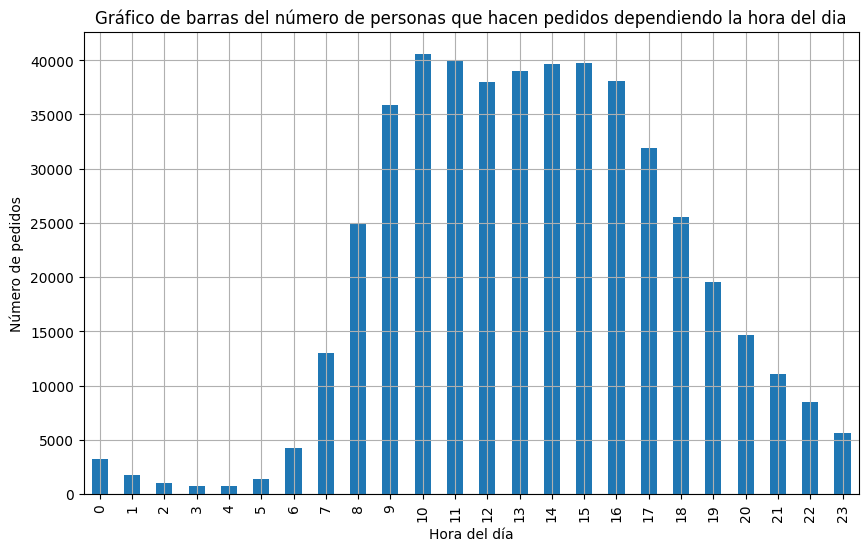

In [37]:
# Gráfico que muestra el numero de personas que hacen pedidos dependiendo de la hora del día.

# Agrupar y contar pedidos por hora
order_per_hour = df_instacart_orders['order_hour_of_day'].value_counts().sort_index()

# Crear el  gráfico
plt.figure(figsize=(10, 6))
order_per_hour.plot(kind='bar')
plt.xlabel('Hora del día')
plt.ylabel('Número de pedidos')
plt.title('Gráfico de barras del número de personas que hacen pedidos dependiendo la hora del dia')
plt.grid(True)
plt.show()

In [60]:
order_per_hour

order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: count, dtype: int64

Después de analizar este gráfico de barras llegamos a la conclusión que el pico de ventas es desde las 8:00 AM hasta las 16:00 PM, siendo las 10:00 AM la hora de máximas ventas mayores a las 40, 000 ventas, seguidas muy de cerca por las ventas de las 11:00 AM. 

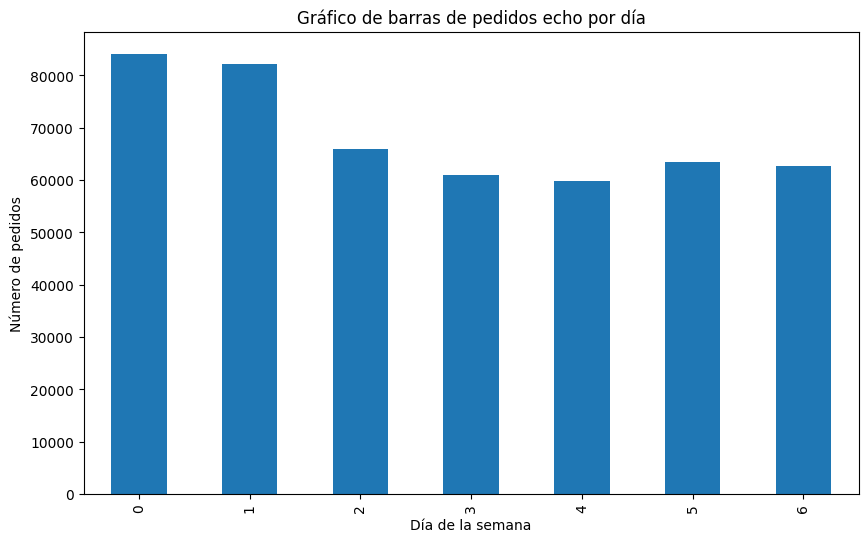

In [38]:
# Creación de un gráfico de barras de pedidos por día

# Agrupar y contar pedidos por día
order_per_day = df_instacart_orders['order_dow'].value_counts().sort_index()

# Creación del gráfico
plt.figure(figsize=(10, 6))
order_per_day.plot(kind='bar')
plt.xlabel('Día de la semana')
plt.ylabel('Número de pedidos')
plt.title('Gráfico de barras de pedidos echo por día')
plt.show()

Después de observar el gráfico podemos concluir que los días de mas ventas es domingo y lunes, ambos días están por encima de las 80,000 ventas por día, siendo el día domingo el día con más ventas.

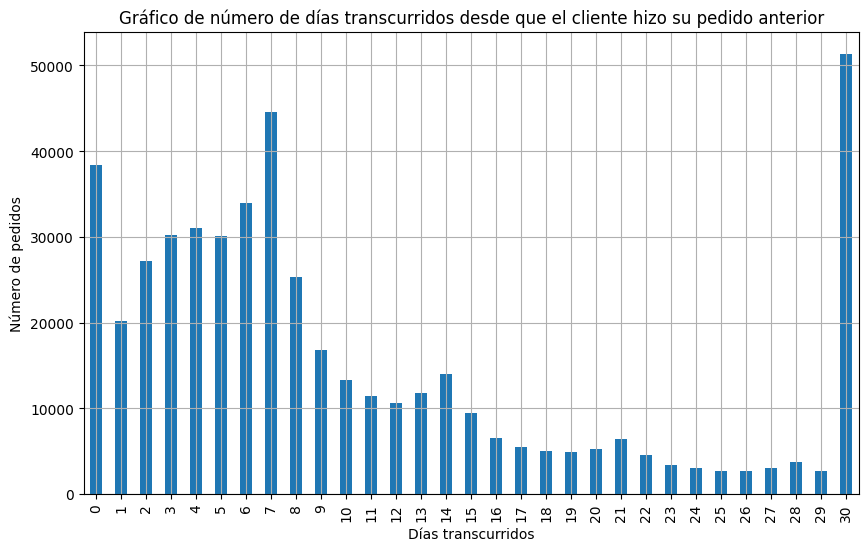

In [39]:
# Gráfico para mostrar el tiempo que las personas esperan para hacer su siguiente pedido.

# Agrupar y contar valores por días de espera
order_per_prior = df_instacart_orders['days_since_prior_order'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
order_per_prior.plot(kind='bar')
plt.xlabel('Días transcurridos')
plt.ylabel('Número de pedidos')
plt.title('Gráfico de número de días transcurridos desde que el cliente hizo su pedido anterior')
plt.grid(True)
plt.show()

In [40]:
# Obtener el día con el mínimo y máximo número de pedidos
min_day = order_per_prior.idxmin()
min_sales = order_per_prior.min()
max_day = order_per_prior.idxmax()
max_sales = order_per_prior.max()

print(f'El día con el mínimo número de pedidos es: {min_day} con {min_sales} pedidos')
print(f'El día con el máximo número de pedidos es: {max_day} con {max_sales} pedidos')

El día con el mínimo número de pedidos es: 26 con 2640 pedidos
El día con el máximo número de pedidos es: 30 con 51337 pedidos


Podemos concluir que el tiempo fluctúa mucho, de echo observamos que a grandes rasgos los clientes no esperan muchos días para hacer otra compra, aunque si tenemos dos cosas muy importantes a resaltar, la primera es interesante ver que la mayoría de clientes compra otro producto a los 30 días exactos, mas de 50,000 pedidos son ordenados cada 30 días, este es el valor máximo, el mínimo es el día 26, con un poco mas de 2,000 pedidos realizados, esto nos deja ver que cada cliente tienes sus preferencias para que día comprar nuevamente otro producto.

In [41]:
# Selección de días de la semana 

wednesday = df_instacart_orders[df_instacart_orders['order_dow'] == 3]
saturday = df_instacart_orders[df_instacart_orders['order_dow'] == 6] 

In [42]:
# Selección de valores únicos de la columna 'order_hour_of_day'
wednesday_counts = wednesday['order_hour_of_day'].value_counts().sort_index().reset_index()
saturday_counts = saturday['order_hour_of_day'].value_counts().sort_index().reset_index()


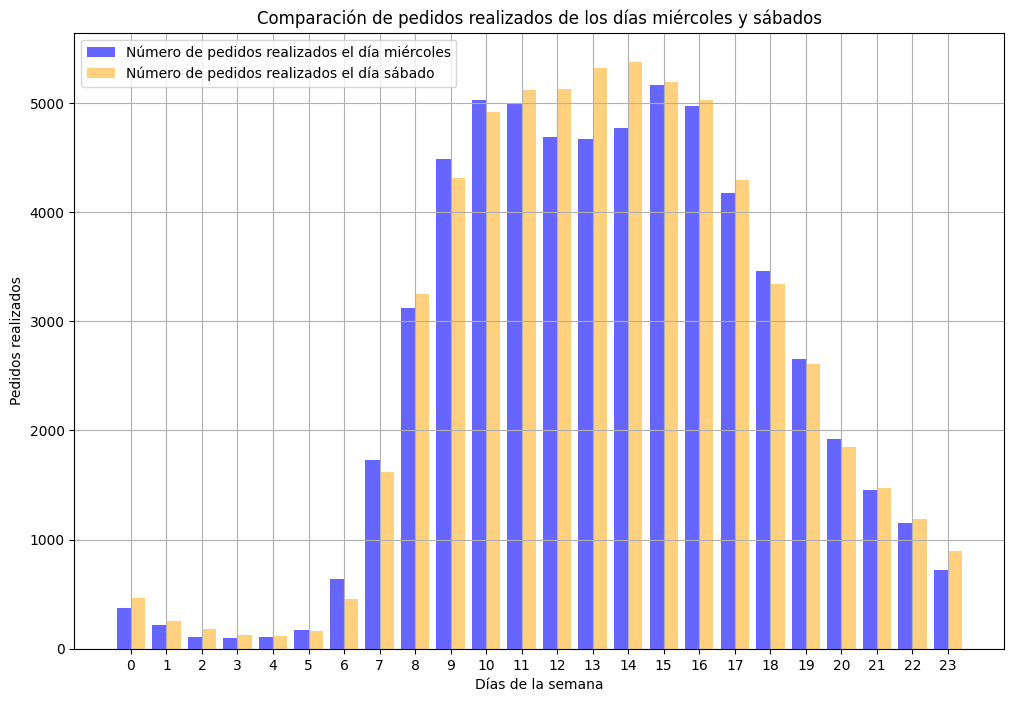

In [43]:
# Gráfico de distribuciones de 'order_hour_of_day' de los miércoles y sábados para observar diferencias

# Crear el gráfico de barras
plt.figure(figsize=(12, 8))

# Gráfico 1: Valor de la variable wednesday
plt.bar(wednesday_counts['order_hour_of_day'] - 0.2, wednesday_counts['count'], width=0.4, label='Número de pedidos realizados el día miércoles', color='blue', alpha=0.6)

# Gráfico 2: Valor de la variable saturday
plt.bar(saturday_counts['order_hour_of_day'] + 0.2, saturday_counts['count'], width=0.4, label='Número de pedidos realizados el día sábado', color='orange', alpha=0.5)

# Configuración del gráfico
plt.xlabel('Días de la semana')
plt.ylabel('Pedidos realizados')
plt.title('Comparación de pedidos realizados de los días miércoles y sábados')
plt.xticks(range(24))
plt.legend()
plt.grid(True)
plt.show()

Después de separar los valores podemos ver que los picos de ventas de pedidos es por encima de los 5,000 productos por hora, cabe destacar que sólo el día sábado mantiene un ritmo bueno de ventas desde las 11:00 AM hasta las 16:00 PM, siendo las ventas más altas a las 14:00 PM del día sábado. Las ventas más altas del día miércoles son a las 10:00 AM y 15:00 PM. También observamos que las primeras horas de ambos días las ventas son muy similares, así como las ventas del final del día son muy similares, con esto concluimos que el día sábado es el que mayor pedidos tiene de los dos días evaluados.

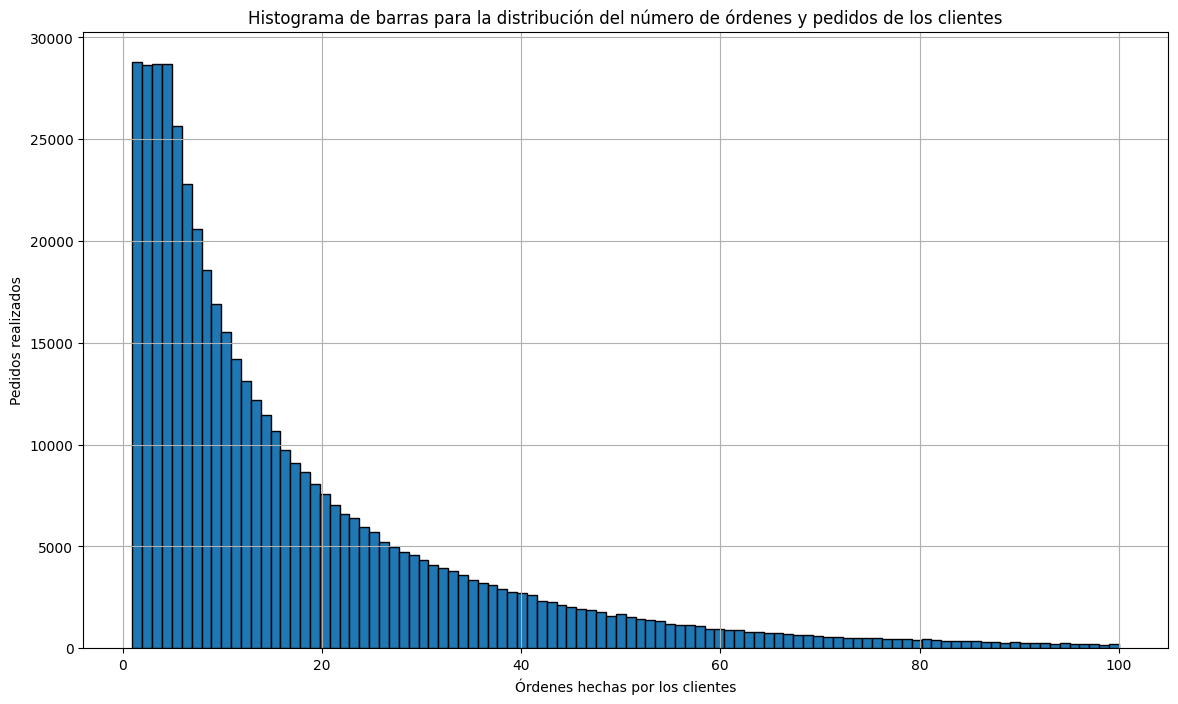

In [44]:
# Histograma de barras para la distribución del número de órdenes que hacen los clientes

order_per_number = df_instacart_orders['order_number'].value_counts().sort_index()

# Histograma el gráfico

plt.figure(figsize=(14, 8))
plt.hist(df_instacart_orders['order_number'], bins=100, edgecolor='black')
plt.xlabel('Órdenes hechas por los clientes')
plt.ylabel('Pedidos realizados')
plt.title('Histograma de barras para la distribución del número de órdenes y pedidos de los clientes')
plt.grid(True)
plt.show()

Podemos observar detalles importantes, los clientes prácticamente compran 4 productos es decir 4 pedidos, a partir del pedido 5 la cifra empieza a decrementar de forma constante, notamos también que aunque muy pocos clientes compran mas de 80 productos los hay, esto nos demuestra que son muy buenos clientes o que en determinado momento ocuparon muchas cosas en un cierto tiempo.  

In [45]:
# Filtrado con merge de los 20 productos mas vendidos
merged_df = pd.merge(df_products, df_order_products, on='product_id', how='inner')
products_counts = merged_df[['product_id', 'product_name']].value_counts().reset_index(name='counts')
top_20_products = products_counts.head(20)

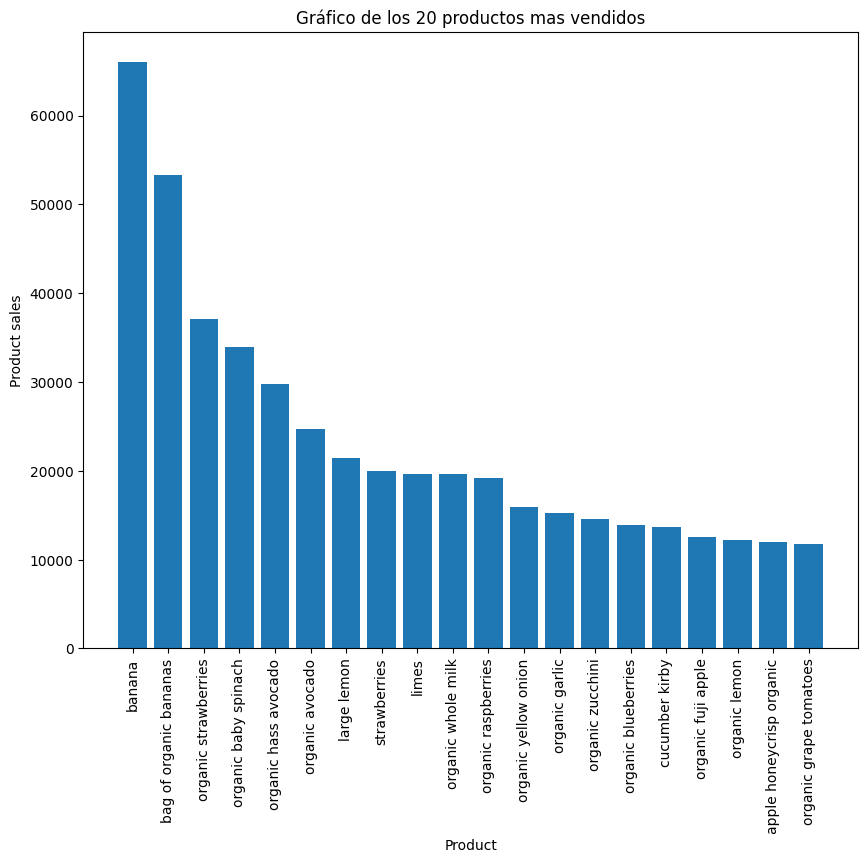

In [46]:
# Df de los 20 productos mas vendidos
top_20_products

# Gráfico de los productos

plt.figure(figsize=(10, 8))
plt.bar(top_20_products['product_name'], top_20_products['counts'])
plt.xlabel('Product')
plt.ylabel('Product sales')
plt.title('Gráfico de los 20 productos mas vendidos')
plt.xticks(rotation=90)
plt.show()

In [47]:
top_20_products

,product_id,product_name,counts
0,24852,banana,66050
1,13176,bag of organic bananas,53297
2,21137,organic strawberries,37039
3,21903,organic baby spinach,33971
4,47209,organic hass avocado,29773
5,47766,organic avocado,24689
6,47626,large lemon,21495
7,16797,strawberries,20018
8,26209,limes,19690
9,27845,organic whole milk,19600


Después de utilizar a merge podemos observar los 20 productos mas vendidos de instacart, el producto mas vendido es la banana con mas de 66,000 ventas y el producto número 20 es organic grape tomatoes con mas de 11,500 ventas, una información mut útil la que acabamos de descubrir junto con el id de cada producto.

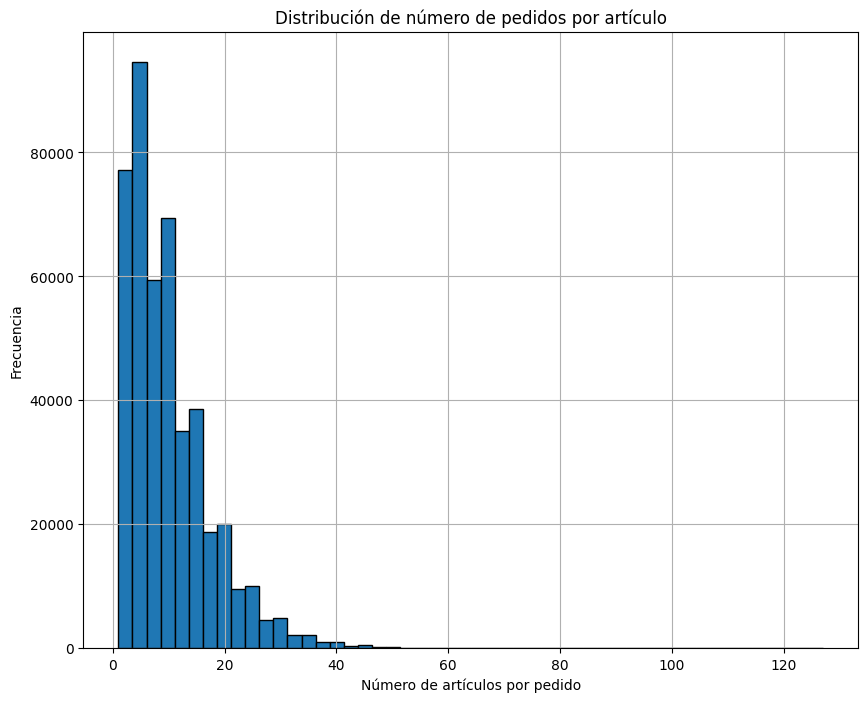

In [48]:
# Selección de cuántos artículos compran las personas en un pedido mediante merge

merge_df_sales = pd.merge(df_instacart_orders, df_order_products, on='order_id', how='inner')
merge_df__order_id = merge_df_sales[['order_id', 'user_id']].value_counts().reset_index()

# Creación del gráfico
plt.figure(figsize=(10, 8))
plt.hist(merge_df__order_id['count'], bins=50, edgecolor='black')
plt.xlabel('Número de artículos por pedido')
plt.ylabel('Frecuencia')
plt.title('Distribución de número de pedidos por artículo')
plt.grid(True)
plt.show()


Después de haber realizado el histograma con la ayuda de los datos resultados de merge, observamos que una cantidad de clientes sumamente alta ordenan entre 1 y 20 artículos por pedido, cerca de 100,000 personas hace esto, también notamos que una cantidad muy chica de clientes ordenan mas de 100 productos por pedido, lo cual es muy interesante. 

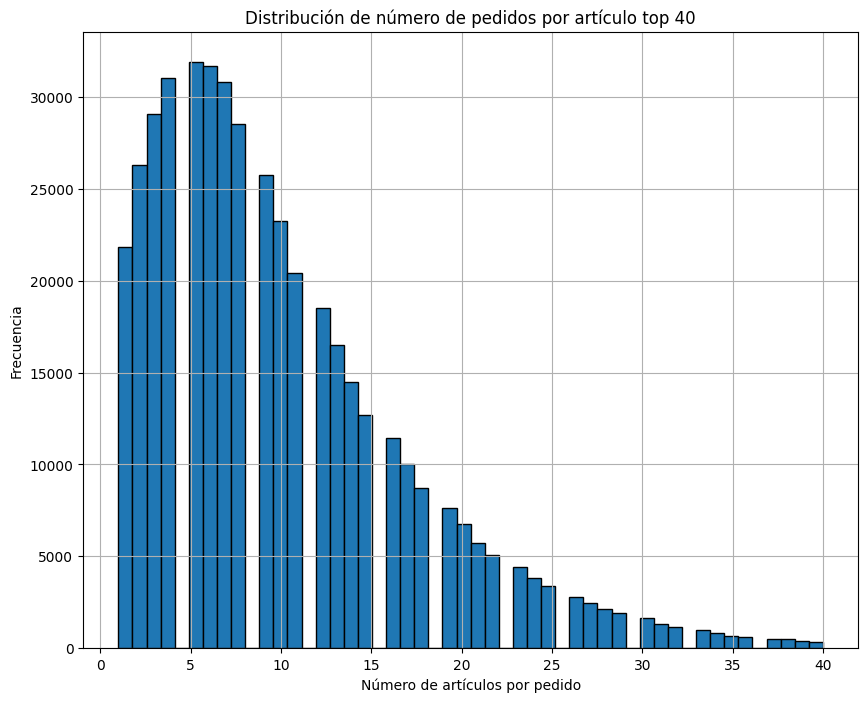

In [63]:
merge_df__order_id_40 = merge_df__order_id[(merge_df__order_id['count'] >= 0) & (merge_df__order_id['count'] <= 40)]

# Creación del gráfico
plt.figure(figsize=(10, 8))
plt.hist(merge_df__order_id_40['count'], bins=50, edgecolor='black')
plt.xlabel('Número de artículos por pedido')
plt.ylabel('Frecuencia')
plt.title('Distribución de número de pedidos por artículo top 40')
plt.grid(True)

Para hacer mas claro el análisis de esta distribución de pedido, optamos por hacer un top 40 de los pedidos que se realizan y cuantos productos tienen cada pedido, concluimos que la mayor cantidad se encuentra entre 1 y 10 productos.

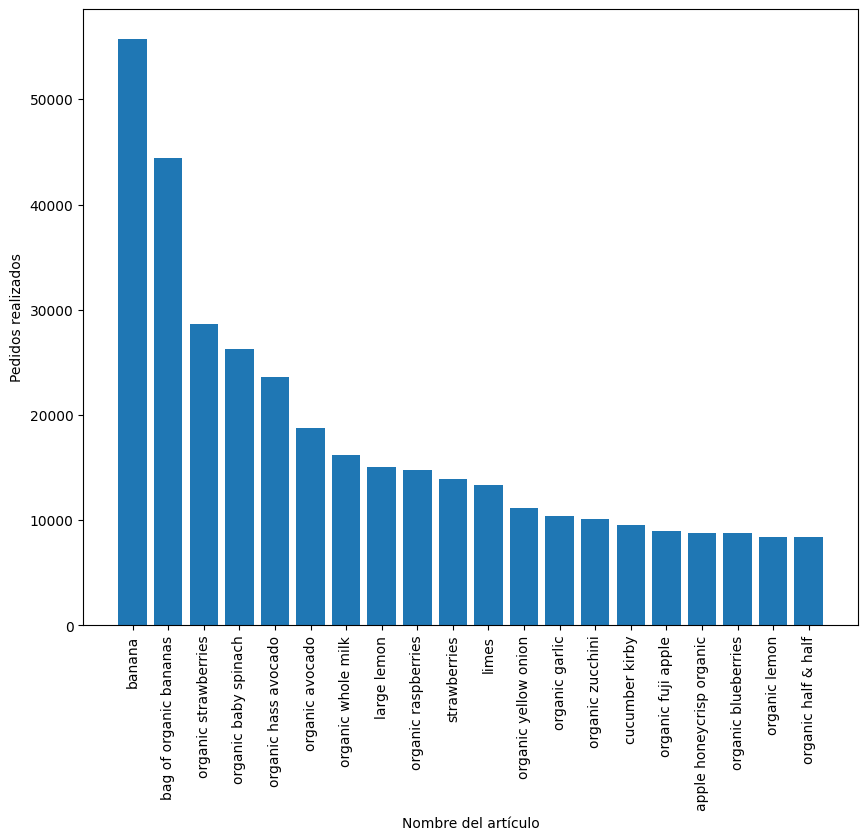

In [49]:
# 20 principales artículos que vuelven a pedirse con mayor frecuencia

merge_product = pd.merge(df_products, df_order_products, on='product_id', how='inner')
merge_product = merge_product[merge_product['reordered'] == 1]
merge_product_filtered = merge_product[['product_id', 'product_name']].value_counts().reset_index().head(20)

# Crear el gráfico

plt.figure(figsize=(10, 8))
plt.bar(merge_product_filtered['product_name'], merge_product_filtered['count'])
plt.xlabel('Nombre del artículo')
plt.ylabel('Pedidos realizados')
plt.xticks(rotation=90)
plt.show()

In [50]:
merge_product_filtered

,product_id,product_name,count
0,24852,banana,55763
1,13176,bag of organic bananas,44450
2,21137,organic strawberries,28639
3,21903,organic baby spinach,26233
4,47209,organic hass avocado,23629
5,47766,organic avocado,18743
6,27845,organic whole milk,16251
7,47626,large lemon,15044
8,27966,organic raspberries,14748
9,16797,strawberries,13945


Tal como vemos en el gráfico, primero con merge unimos los datos, después implementamos filtros para llegar a los 20 artículos reordenados mas vendidos, nuevamente vimos que el artículo más vendido es banana con mas de 55,000 ventas, lo que si podemos decir, es que algunos valores cambiaron respecto a la gráfica hecha anteriormente sobre solo los 20 artículos más vendidos. Con esto tenemos en claro cuales son los artículos que mas se piden otra vez. 

In [51]:
# Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
merge_total_product = pd.merge(df_instacart_orders, df_order_products, on='order_id', how='inner')
merge_total_product = pd.merge(merge_total_product, df_products, on='product_id', how='inner')

# Calcula el numero total de pedidos por producto
product_total_order = merge_total_product.groupby('product_id')['order_id'].count()

# Calcular el numero total de pedidos reordenados por producto
product_total_reorder = merge_total_product[merge_total_product['reordered'] == 1].groupby('product_id')['user_id'].count()

# Calcular la taza de repetición
product_total_rate = product_total_reorder / product_total_order
product_total_rate.fillna(0, inplace=True)
product_total_rate = product_total_rate.reset_index(name='reorder_rate')
product_total_rate = pd.merge(product_total_rate, df_products[['product_id', 'product_name']], on='product_id', how='left')
product_total_rate = product_total_rate[product_total_rate['reorder_rate'] != 0].sort_values(by='reorder_rate', ascending=False)
product_total_rate.head(50)

,product_id,reorder_rate,product_name
10973,12038,1.0,for women maximum absorbency l underwear
1646,1809,1.0,slow kettle style santa fe chicken enchilada s...
33130,36122,1.0,spicy chili beans
2929,3205,1.0,original pure chocolate whippet cookies
38398,41901,1.0,moisturizing lotionized shave gel with vitamin e
42526,46398,1.0,chocolate animal crackers
9464,10378,1.0,honey flake & oat clusters
28455,31026,1.0,drinkable yogurt- mango
42558,46437,1.0,spinach saag medium indian simmer sauce
19043,20787,1.0,west coast style stout


En este DateFrame podemos ver la taza de cada producto que se reordena, es decir que antes el cliente ya había comprado el producto y lo vuelve a adquirir, con la ayuda de algunos merge pudimos llegar a esta conclusión. Aquí se puede observar el top 50 de los productos con mas taza de reordenamiento, información que estaba escondida, pero que al encontrarla que útil es, todos los que tienen tasa de 1.0 quiere decirnos que antes los clientes ya habían comprado este producto, lo cual nos dice que son productos muy populares y con una muy alta demanda en la tienda. 

In [52]:
merge_total_client = pd.merge(df_instacart_orders, df_order_products, on='order_id', how='inner')

# Total de pedidos agrupados por cliente
merge_total_client_order = merge_total_client.groupby('user_id')['order_id'].count()

# Total de pedidos reordenados por cliente
merge_total_client_reorder = merge_total_client[merge_total_client['reordered'] == 1].groupby('user_id')['order_id'].count()

# Taza de clientes que han reordenado en instacart
total_client_rate =  merge_total_client_reorder / merge_total_client_order

# Rellenar NaN con 0
total_client_rate.fillna(0, inplace=True)

total_client_rate = total_client_rate.reset_index(name='reorder_rate').sort_values(by='reorder_rate', ascending=False)
total_client_rate = total_client_rate[total_client_rate['reorder_rate'] != 0]
total_client_rate.head(50)

,user_id,reorder_rate
99672,137587,1.0
125732,173474,1.0
10138,13918,1.0
45067,62300,1.0
45074,62307,1.0
69811,96301,1.0
45076,62312,1.0
35222,48616,1.0
45079,62316,1.0
138633,191162,1.0


En este DateFrame podemos ver la taza de cada cliente que se reordena, es decir que antes el cliente ya había comprado y en un futuro repitió sus compras, con la ayuda de algunos merge pudimos llegar a esta conclusión. Aquí se puede observar el top 50 de los clientes con mas taza de reordenamiento, información que estaba escondida, pero que al encontrarla que útil es, todos los que tienen tasa de 1.0 quiere decirnos que antes los clientes ya habían comprado, lo cual nos dice que son clientes leales y potenciales compradores. 

In [53]:
# Utilizar merge para unir las tablas y la información
add_to_cart_merge = pd.merge(df_instacart_orders, df_order_products, on='order_id', how='inner')
add_to_cart_merge = pd.merge(add_to_cart_merge, df_products, on='product_id', how='inner')

# Filtrar los valores que se agregan primero al carrito
first_in_car = add_to_cart_merge[add_to_cart_merge['add_to_cart_order'] == 1]

# Agrupar los datos por la columna add_to_cart_order
top_first_in_car = first_in_car.groupby(['product_name', 'product_id']).size().reset_index(name='count')
top_first_in_car = top_first_in_car.sort_values(by='count', ascending=False).head(20)
top_first_in_car


,product_name,product_id,count
2174,banana,24852,15562
2057,bag of organic bananas,13176,11026
17764,organic whole milk,27845,4363
17406,organic strawberries,21137,3946
16332,organic hass avocado,47209,3390
15377,organic baby spinach,21903,3336
15355,organic avocado,47766,3044
23000,spring water,19660,2336
23243,strawberries,16797,2308
17025,organic raspberries,27966,2024


## Conclusiones finales del proyecto <a id='end'></a>

Este proyecto se centró en el análisis de los datos de pedidos de Instacart para obtener información valiosa sobre el comportamiento de compra de los clientes. Utilizamos diversas técnicas de análisis de datos y visualización para responder a preguntas específicas y descubrir patrones en los datos. Los principales objetivos fueron entender la frecuencia de reordenamiento de productos, identificar los productos más vendidos y los que se agregan primero al carrito, y analizar la distribución de los pedidos por cliente.

Principales Hallazgos
1. Distribución del Número de Órdenes por Cliente:

- La mayoría de los clientes realizan un número relativamente bajo de pedidos, con una disminución significativa a medida que aumenta el número de órdenes.
- Los histogramas mostraron que la distribución de pedidos sigue una curva descendente, indicando que pocos clientes realizan un gran número de pedidos.

2. Tasa de Repetición de Pedidos por Producto:

- Calculamos la tasa de repetición de pedidos (reordenamientos) para cada producto.
- Los productos con una alta tasa de repetición son aquellos que los clientes compran repetidamente, lo que puede indicar una alta satisfacción o necesidad continua.

3. Productos Más Vendidos:

- Identificamos los 20 productos más vendidos en la plataforma.
- Los productos orgánicos y básicos como "banana", "bag of organic bananas" y "organic whole milk" estuvieron entre los más vendidos, reflejando las preferencias de los clientes por productos saludables y esenciales.

4. Artículos Añadidos Primero al Carrito:

- Analizamos cuáles son los 20 principales artículos que los clientes agregan primero a sus carritos.
- Los productos que se agregan primero tienden a ser esenciales o de alta prioridad para los clientes, como "banana" y "organic whole milk".
- Esta información puede ser útil para estrategias de marketing y promociones.

5. Distribución de Pedidos por Hora y Día:

- Examinamos la distribución de los pedidos realizados en diferentes días de la semana y horas del día.
- Los patrones de pedidos mostraron picos en ciertas horas, como a media mañana y en la tarde, y variaciones entre días de semana y fines de semana.
- Esta información puede ayudar a optimizar la logística y la gestión de inventarios.

**Implicaciones para el Negocio**
- Estrategias de Marketing: La identificación de productos más vendidos y los que se agregan primero al carrito puede orientar las campañas de marketing y promociones. Focalizarse en productos con alta tasa de repetición puede aumentar la lealtad del cliente.
- Gestión de Inventarios: Entender los patrones de compra y las horas pico puede mejorar la gestión de inventarios y la planificación de la cadena de suministro.
- Mejora de la Experiencia del Cliente: Al conocer las preferencias de los clientes y sus comportamientos de compra, Instacart puede personalizar recomendaciones y mejorar la experiencia del usuario en la plataforma.